In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Traemos nuestros datos del "csv" train.csv y lo cargamos en dos dataframe.
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv") 

* Si tuvieramos el archivo en otro directorio tendríamos este formato
* df_prueba = pd.read_csv("./../data/train.csv")
* Significa, desde el punto donde se encuentra mi análisis, subir un directorio, en ese punto acceder a data y traerme el archivo correspondiente.

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.- Comenzando la Exploración de los Datos. 

In [4]:
# Qué columnas (variables) tienen los datos?
df_train.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
#Que dimensión posee nuestro dataframe?
df_train.shape #891 filas / 12 columnas

(891, 12)

In [6]:
#Como identificamos si estamos a punto de trabajar con datos nulos?
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Resultado:
* Los apartados que presentan datos nulos son "Age", "Cabin" y "Embarked"
¿Qué podemos hacer?
    * Podemos imputar datos 
    * Eliminar renglones donde exista carencia de información.

# Aplicamos Estadísitca Descriptiva

In [7]:
#Esto es considerando variables numéricas. 
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observaciones:
* Variables como "PassengerID" no resisten análisis, además valorar Survived como si fuera una variable numérica es erróneo, ya que es en sí de tipo categórica. 
* Lo más relevante ante esto sería el promedio de las edades que rondan los 29 con una desviación estándar de 14. 


In [8]:
#Consideremos nuestras variables categóricas. 
df_train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Observaciones:
* Es este conteo corroboramos los datos faltantes tanto de "Cabin" como de la variable "Embarked"
* Los Nombres en efecto son valores únicos, siendo el pasajero top del dataframe Braund, Mr. Owen Harris.
* El "Sex" por obvias razones posee 2 valores únicos, siendo el más recurrente el género masculino con una frecuencia de 557, mucho más de la mitad. 
* Podemos observar que existe la posibilidad de que los pasajeros compartan un mismo ticket, al parecer es el ticket "347082" el cual tiene mayor frecuencia (7)
* De igual modo tenemos la cabina que albergó a mas pasajeros B96 B98
* Y por último el "Embarked" el cual nos permite observar que la puerta de embarque predilecta de los pasajeras tiene denominación "S" con una frecuencia de utilización de 644.

# ¿Cuál es nuestra variable Target?

* Debido a que este caso es muy popular no es para nada complicado dilucidar cuál será nuestra variable objetivo...
* Puesto a que posaremos nuestros esfuerzos a intetar formular un perfil de aquellos pasajeros que sobrevivieron ante este trágico hundimiento. 

In [9]:
# Como se comporta la variable "Survived"
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* Sobrevivieron al menos 342 pasajeros
* Fallecieron 549 pasajeros. 

* Tenemos un punto de vista general de sobrevivientes, sin embargo...
* Como se comportaron en torno a la variable "SEX"

In [10]:
#Comportamiento de la variable "Survived" según la variable "Sex"
df_train.groupby(["Survived","Sex"]).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

* En cuanto a las no sobrevivientes del género femenino obtenemos 81
* En cuanto a los no sobrevivientes del género masculino obtenemos 468
* En cuanto a las sobrevivientes del género femenino obtenemos 233
* En cuanto a los sobrevivientes del género masculino obtenemos 109
    * Apreciación: Existe un indicio que nos puede hacer pensar que las probabilidades de supervivencia en cuanto a mujeres es superior a la de los hombres.   

# Procedemos a Graficar

* Aplicable cuando queremos ver la frecuencia de una variable por categorías de otras. 

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


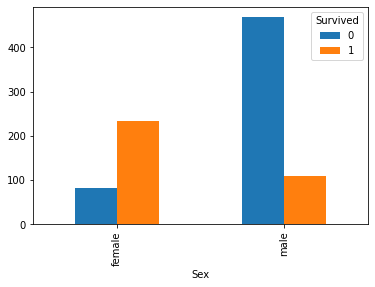

In [11]:
group_sex = df_train.groupby(["Survived","Sex"]).size()
print(group_sex)
group_sex.unstack(level=0).plot.bar() #La primera Variable será la Leyenda. 
#Tambien la primera variable pasará a ser una nueva columna
plt.show()

* No cabe dudas, en el caso de los hombres tendieron a no sobrevivir en mayor medida que las mujeres, ellas incluso teniendo un baja proporción de deceso. 

# Segunda Gráfica

In [12]:
#Veamos cuantos pasajeros corresponde a según a la "clase" que pertenecían
df_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

* Los pasajeros con clase 3 son 491
* Los pasajeros con clase 2 son 184
* Los pasajeros con clase 1 son 216

* Podríamos deducir que la clase 3 era la más económica, dado a su alta frecuencia, sin embargo resulta curioso que la primera clase sea mucho más frecuente que la clase de tipo 2...

* Veamos que acontece cuando agrupamos a esta variable con "Embarked"--

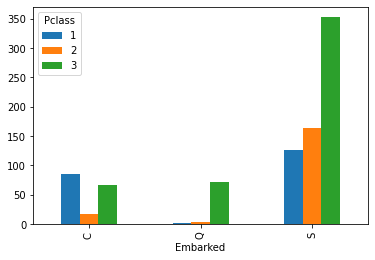

In [13]:
group_embarked = df_train.groupby(["Pclass","Embarked"]).size()
group_embarked.unstack(level=0).plot.bar()
plt.show()

* Con respecto a la puerta de embarque C, los que más la emplearon fueron pasarejos de tipo 1 & 3, aunque de igual modo no se le considera "popular"
* Con respecto a la puerta de embarque Q, Podría ser la menos empleada, aunque de todos modos utilizada por algunos pasajeros de tipo 3 y poquísimas excepciones.
* Con respecto a la puerta de embarque S, definitivamente hablamos de la que tiene mayor empleabilidad, donde existe participación de todos los tipos de pasajeros activamente, haciendo énfasis en la frecuencia de los pasajeros de tipo 3, los cuales como analizamos son los que proliferan.


# Gráficas Adicionales

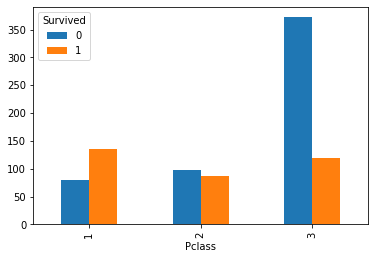

In [14]:
group_pclass = df_train.groupby(["Survived","Pclass"]).size()
group_pclass.unstack(level= 0).plot.bar()
plt.show()

* La gráfica nos demuestra de primera mano que aquellos pasajeros no sobrevivientes proliferan en la clase 3, lo que podría significar que pertenecer a una clase superior aumentaba tus probabilidades de sobrevivir, sin duda será empleada en el análisis. 

# Extra: La Edad influiría?

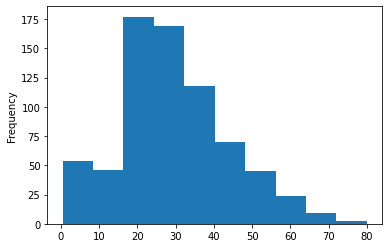

In [15]:
#Histograma de la edad. 
df_train["Age"].plot.hist()
plt.show()

* Los Pasajeros de una edad entre 20 y 40 eran los más recurrentes en el navío.

In [16]:
#Tomando en Cuenta los Pasajeros con edad más común. entre 20 a 40
condicion = (df_train["Age"] > 20) & (df_train["Age"]<40)
df_train[condicion]["Survived"].value_counts()

0    225
1    147
Name: Survived, dtype: int64

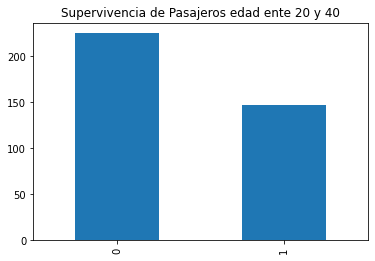

In [17]:
#Gráfico
df_train[condicion]["Survived"].value_counts().plot.bar()
plt.title("Supervivencia de Pasajeros edad ente 20 y 40")
plt.show()

* Los pasajeros de edades convencionales, en su mayoría perecieron, sin embargo la diferencia no es alarmante aunque si a tomarse en cuenta.

In [18]:
#Tomando en cuenta los Pasajeros más jovenes. menores o iguales a 20
condicion = (df_train["Age"] <= 5) 
df_train[condicion]["Survived"].value_counts()

1    31
0    13
Name: Survived, dtype: int64

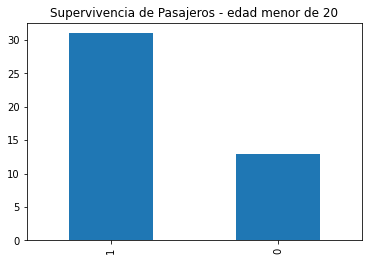

In [19]:
df_train[condicion]["Survived"].value_counts().plot.bar()
plt.title("Supervivencia de Pasajeros - edad menor de 20")
plt.show()

* Los pasajeros menores de 20 parecen guardar mucha más homogeneidad en cuanto a la supervivencia y el deceso. 
* Podríamos decir que poseer esta edad en el hundimiento fue un factor a considerar para determinar la supervivencia del pasajero. 

In [20]:
#Tomando en cuenta los Pasajeros con edad mayor o iguales a 40
condicion = (df_train["Age"]>=40)
df_train[condicion]["Survived"].value_counts()

0    102
1     61
Name: Survived, dtype: int64

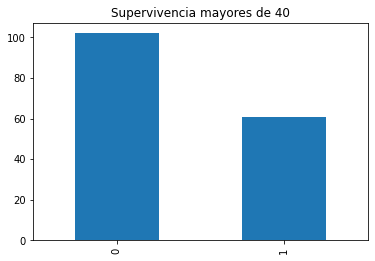

In [21]:
df_train[condicion]["Survived"].value_counts().plot.bar()
plt.title("Supervivencia mayores de 40")
plt.show()

* En cuanto a los mayores de 40, guardan una relación similar de supervivencia a la de las edades más comunes de los pasajeros. 
* Esto podría explicarse dado a que muchos de ellos debieron tener preferencias a la hora de ser rescatados, teniendo en consideración a pasajeros de mucha más edad es muy probable. 

* Resultado: Determinamos que la edad deberá ser un criterio válido para nuestro procesamiento de Datos!!

# 3.- Procesamiento de Datos

* Según tu criterio... cual crees que serían las variables a considerar si se desearía construir un perfil del pasajero? En son claro de saber si sobrevivió o no.


* Obviamente incluimos las siguientes:
    * "Survived" → Nuestra variable objetivo
    * "Sex" → Hemos presenciado que el sexo podría ser decisivo a la hora de "intuir" si un pasajero sobrevivió
    * "Age" → La edad también debería ser considerada como lo estipulamos con anterioridad. 
    * "Pclass" → Claro que también podríamos considerar el tipo de pasajero, será que en efecto ser de primera clase era un factor que aumentaba tus probabilidades de sobrevivir?

In [22]:
#Visualizamos los primeros elementos de nuestra tabla con estos apartados.
df_train[["Survived","Sex","Age","Pclass"]].head()

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3


* Estudiamos los datos nulos!

In [23]:
df_train[["Survived","Sex","Age","Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


* Vemos que tenemos datos nulos en el apartado de las Edades
* Sin embargo debemos considerar que la variable "Sex" es de tipo objeto, detalle que debemos siempre solventar. [Debemos hacerlo numérico]

In [24]:
#Como se distribuyen los NULOS en la variable "Age"?
condicion = df_train["Age"].isna() #todos los que su edad sea nula [No registrada]
a = df_train[condicion].groupby(["Sex","Pclass"]).size() #No es una tabla
a.unstack(level=0) #Lo convertimos en una tabla

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


* Observamos que gran cantidad de pasajeros cuyas edades no han sido registrado proliferan en la tercera clase, y suelen ser hombres en mayor medida y mujeres en segundo lugar. 

Analicemos entorno a las variables "SibSP" y "Parche" de los datos nulos en edad- 

In [25]:
condicion = df_train["Age"].isna() 
a = df_train[condicion].groupby(["SibSp","Parch"]).size()
a.unstack(level = 0)

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


* Considerando Parch [numero de hijos o padres en el barco] y SibPp [numero de hermanos en el barco]
* Tenemos que gran cantidad de datos con edades no registradas, navegaban solitario en el barco. 
* En segunda medida tenemos a 21 datos nulos, de los cuales se registra tener al menos un hermano en barco. 

# Recuerda que tenemos datos faltantes en Edad

In [26]:
#Es momento de imputar. Calculamos la mediana
df_train["Age"].median()


28.0

* Tenemos una mediana en 28
* En el ejercicio guía se recomienda usar esta edad para imputar aquellos datos faltantes
* Sin embargo mi juicio sería mejor considerar una edad mas cercana a 29
* Aunque seguiremos el modelo del ejercicio como tal. 

In [27]:
#inputamos nuestro valor para deshacernos de los nulos
df_train["Age"] = df_train["Age"].fillna(28.0)

In [28]:
df_train[["Survived","Sex","Age","Pclass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


* En efecto ya no poseemos datos nulos en el apartado "Age"
* Debemos trabajar ahora con nuestro variable de tipo object

In [29]:
#Mapeamos nuestra variable
df_train["Sex"] = df_train["Sex"].map({"female":1,"male":0}).astype(int)

* Reemplazando la columna "Sex" por ese valor pero Mapeandolo, a que el valor female sea igual a 1, mientras que male sea 0, finalmente lo convierto a "Entero"
* No se debe olvidar las {} en la función map.  

In [30]:
df_train[["Survived","Sex","Age","Pclass"]].head()

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3


# Crear nuevas variables

In [31]:
#Creamos una variable que nos indique si el pasajero viaja "SOLO"
condicion = (df_train["SibSp"] == 0) & (df_train["Parch"] == 0)

df_train["Solo"] = np.where(condicion,1,0)

# Graficamos

* Ahora haremos un recuento de la supervivencia de aquellos pasajeros que viajaron solos.

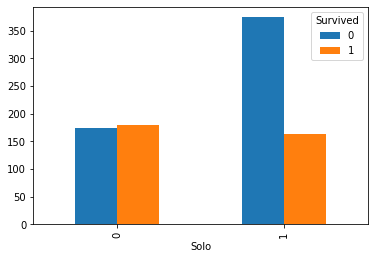

In [32]:
group_solo = df_train.groupby(["Survived","Solo"]).size()
group_solo.unstack(level=0).plot.bar()
plt.show()

* Observamos que aquellos pasajeros que viajaban solos, parecen tener una proporcion se sobrevivir y fallecer muy similares.
* Por el contrario un pasajero que sí viaja a solas, tiende a no sobrevivir o al menos eso es lo que parece.

In [33]:
df_train[["Survived","Sex","Age","Pclass","Solo"]].head()

,Survived,Sex,Age,Pclass,Solo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1
3,1,1,35.0,1,0
4,0,0,35.0,3,1


# Preparamos nuestro entrenamiento

In [34]:
#Variable dependiente de entrenamiento
Y_train = df_train["Survived"] #Nuestra variable objetivo

#Procesamiento de variables independientes
lista_var = ["Sex","Age","Pclass","Solo"]
X_train = df_train[lista_var]

#Imprimimos sus dimensiones
print(Y_train.shape,X_train.shape)

(891,) (891, 4)


* Entrenamiento en Y, 891 registros, con una columna
* Entrenamiento en X, 891 registros con 4 columnas.

# 4. Modelos

* Emplearemos regresión logística
* Árboles de decisión

In [35]:
#Entrenando modelo de regresión logística. 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
plt.show()

In [36]:
#Entrenando modelo arboles de decisión.
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
plt.show()

# Matriz de Confusion - Evaluación

In [37]:
from sklearn.metrics import plot_confusion_matrix
def conf_mat_acc(modelo):
    disp = plot_confusion_matrix(modelo,X_train,Y_train,cmap =plt.cm.Blues,values_format ="d")
    true_pred = disp.confusion_matrix[0,0] + disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    acurracy = true_pred/total_data
    print ("Acurracy: ",np.round(acurracy,2))
    plt.show()


Acurracy:  0.79


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


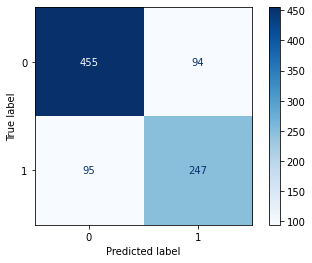

In [38]:
conf_mat_acc(logreg)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Acurracy:  0.89


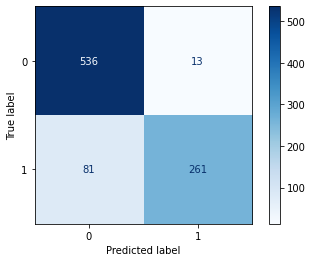

In [39]:
conf_mat_acc(decision_tree)

# Evaluando en nuestro SET de Testeo[DF_TEST]

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* Pre-Procesamos nuesto df_test

In [41]:
#Mapeamos la variable sex
df_test["Sex"] = df_test["Sex"].map({"female":1,"male":0}).astype(int)
#Nos deshacemos de los datos nulos en la edad. 
df_test["Age"] = df_test["Age"].fillna(28.0)
#No olvidemos crear nuestra variable de Pasajero Solitario.
condicion = (df_test["SibSp"] == 0) & (df_test["Parch"] == 0)
df_test["Solo"] = np.where(condicion,1,0)

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Solo         418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 36.0+ KB


In [43]:
#Variable dependiente testeo
Y_train = df_train["Survived"] #Nuestra variable objetivo

#Procesamiento de variables independientes testeo
lista_var = ["Sex","Age","Pclass","Solo"]
X_train = df_train[lista_var]

#Imprimimos sus dimensiones
print(Y_train.shape,X_train.shape)

(891,) (891, 4)


In [44]:
#Empezamos a predecir, creamos X_test
X_test = df_test[lista_var]
print(X_test.shape)

(418, 4)


In [45]:
#Prediccion de Survived en test, set
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


In [46]:
#En caso de querer exportar estas predicciones en un CSV
def download_output(y_pred,name):
    output = pd.DataFrame({"PassengerId":df_test.PassengerId,"Survived":y_pred})
    output.to_csv(name,index=False)

In [47]:
download_output(Y_pred_log,"yako_pred_log.csv")
download_output(Y_pred_tree,"yako_pred_tree.csv")